<a href="https://colab.research.google.com/github/sarunsmenon/llm/blob/main/Story_Book_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and Load Libraries

In [ ]:
!pip install -Uq diffusers transformers fastcore einops python-dotenv openai langchain-openai cohere langchain langchain_community

In [ ]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from diffusers import StableDiffusionPipeline
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

from fastcore.all import concat
from huggingface_hub import notebook_login, login
from PIL import Image

from google.colab import userdata

import json

import os
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv, find_dotenv

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.pydantic_v1 import BaseModel, Field

from PIL import Image
import matplotlib.pyplot as plt

from diffusers import AutoPipelineForText2Image
import pickle

from PIL import Image, ImageFont, ImageDraw
from PIL import Image, ImageEnhance

In [ ]:
logging.disable(logging.WARNING)

torch.manual_seed(1)
if not (Path.home()/'.cache/huggingface'/'token').exists(): login(userdata.get('huggingface_api'))

In [ ]:
!ls ~/.cache/huggingface/hub

models--stabilityai--sdxl-turbo  version_diffusers_cache.txt  version.txt


# Define Parameters

In [ ]:
#open_ai_key = userdata.get('open_ai_key')
llm_model = 'gpt-3.5-turbo-0301'
os.environ['OPENAI_API_KEY'] = userdata.get('open_ai_key')
#print(userdata.get('open_ai_key'))

In [ ]:
chat = ChatOpenAI(temperature=0.0, model=llm_model)
chat

ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7f6cbac6f2e0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7f6cbaca8d00>, model_name='gpt-3.5-turbo-0301', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='')

In [ ]:
pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.26.3",
  "_name_or_path": "stabilityai/sdxl-turbo",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

# Story

In [ ]:
story_template = """\
tell a creative kids story with the following conditions -
1. it should be safe for kids
2. it should be simple language suitable for kids
3. it should have atleast 200 words
4. it should only have 2 main characters
"""

In [ ]:
prompt_template = ChatPromptTemplate.from_template(story_template)
print(prompt_template)

input_variables=[] messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='tell a creative kids story with the following conditions -\n1. it should be safe for kids\n2. it should be simple language suitable for kids\n3. it should have atleast 200 words\n4. it should only have 2 main characters\n'))]


In [ ]:
chain = prompt_template | chat
resp = chain.invoke({})

In [ ]:
story = str(resp.content)
print(story)

Once upon a time, in a faraway land, there lived a little girl named Lily. She lived in a small cottage with her grandmother. Lily loved to play in the garden and pick flowers. One day, while she was playing, she saw a little bird lying on the ground. The bird was hurt and couldn't fly.

Lily felt sad for the bird and decided to take care of it. She picked up the bird and brought it to her grandmother. Her grandmother was a wise woman and knew how to take care of animals. She told Lily to make a nest for the bird and feed it some seeds.

Lily did as she was told and made a cozy nest for the bird. She also fed it some seeds and water. The bird slowly started to recover and soon it was able to fly again.

The bird was very grateful to Lily and wanted to do something to thank her. So, it decided to take her on a magical adventure. The bird took Lily on its back and flew high up in the sky. They flew over mountains, rivers, and forests. Lily was amazed by the beautiful sights she saw.

Aft

In [ ]:
story = """
Once upon a time, in a faraway land, there lived a little girl named Lily. She lived in a small cottage with her grandmother. Lily loved to play in the garden and pick flowers. One day, while she was playing, she saw a little bird lying on the ground. The bird was hurt and couldn't fly.

Lily felt sad for the bird and decided to take care of it. She picked up the bird and brought it to her grandmother. Her grandmother was a wise woman and knew how to take care of animals. She told Lily to make a nest for the bird and feed it some seeds.

Lily did as she was told and made a cozy nest for the bird. She also fed it some seeds and water. The bird slowly started to recover and soon it was able to fly again.

The bird was very grateful to Lily and wanted to do something to thank her. So, it decided to take her on a magical adventure. The bird took Lily on its back and flew high up in the sky. They flew over mountains, rivers, and forests. Lily was amazed by the beautiful sights she saw.

After a while, the bird landed on a tree and told Lily that it was time to go back home. Lily thanked the bird for the wonderful adventure and promised to take care of all the animals she came across.

From that day on, Lily became known as the girl who loved animals. She would always help any animal in need and take care of them. And the little bird became her best friend and would often take her on magical adventures.
"""

# Image Prompt

In [ ]:
img_prompt_template = """
the input text for this is : {story}

your task is to split the content into 5 parts. and for each part create a prompt that can be used by DALLE to make images. the prompt for images should follow below rules -
1. not use names instead use the type of object they are. for example if we describe Daisy the yellow duck , the prompt should include yellow duck.
2. the prompt for images should be in as simple terms as possible
3. prompt should have less than 20 words.

The output should be a valid json format and for each page should have the relevant text and image prompt in the json.

"""



In [ ]:
prompt_template = ChatPromptTemplate.from_template(img_prompt_template)
print(prompt_template)

input_variables=['story'] messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['story'], template='\nthe input text for this is : {story}\n\nyour task is to split the content into 5 parts. and for each part create a prompt that can be used by DALLE to make images. the prompt for images should follow below rules -\n1. not use names instead use the type of object they are. for example if we describe Daisy the yellow duck , the prompt should include yellow duck.\n2. the prompt for images should be in as simple terms as possible\n3. prompt should have less than 20 words.\n\nThe output should be a valid json format and for each page should have the relevant text and image prompt in the json. \n\n'))]


In [ ]:
chain = prompt_template | chat
resp = chain.invoke({'story' :story })

In [ ]:
page_prompts = str(resp.content)
print(page_prompts)

{
  "page1": {
    "text": "Once upon a time, in a faraway land, there lived a little girl named Lily. She lived in a small cottage with her grandmother. Lily loved to play in the garden and pick flowers. One day, while she was playing, she saw a little bird lying on the ground. The bird was hurt and couldn't fly.",
    "image_prompt": "A little girl playing in a garden and picking flowers."
  },
  "page2": {
    "text": "Lily felt sad for the bird and decided to take care of it. She picked up the bird and brought it to her grandmother. Her grandmother was a wise woman and knew how to take care of animals. She told Lily to make a nest for the bird and feed it some seeds.",
    "image_prompt": "A little girl holding a bird and talking to her grandmother."
  },
  "page3": {
    "text": "Lily did as she was told and made a cozy nest for the bird. She also fed it some seeds and water. The bird slowly started to recover and soon it was able to fly again.",
    "image_prompt": "A bird sittin

In [ ]:
page_prompts = """
{
  "page1": {
    "text": "Once upon a time, in a faraway land, there lived a little girl named Lily. She lived in a small cottage with her grandmother. Lily loved to play in the garden and pick flowers. One day, while she was playing, she saw a little bird lying on the ground. The bird was hurt and couldn't fly.",
    "image_prompt": "A little girl playing in a garden and picking flowers."
  },
  "page2": {
    "text": "Lily felt sad for the bird and decided to take care of it. She picked up the bird and brought it to her grandmother. Her grandmother was a wise woman and knew how to take care of animals. She told Lily to make a nest for the bird and feed it some seeds.",
    "image_prompt": "A little girl holding a bird and talking to her grandmother."
  },
  "page3": {
    "text": "Lily did as she was told and made a cozy nest for the bird. She also fed it some seeds and water. The bird slowly started to recover and soon it was able to fly again.",
    "image_prompt": "A bird sitting in a cozy nest made by a little girl."
  },
  "page4": {
    "text": "The bird was very grateful to Lily and wanted to do something to thank her. So, it decided to take her on a magical adventure. The bird took Lily on its back and flew high up in the sky. They flew over mountains, rivers, and forests. Lily was amazed by the beautiful sights she saw.",
    "image_prompt": "A little girl riding on the back of a bird and flying over mountains and rivers."
  },
  "page5": {
    "text": "After a while, the bird landed on a tree and told Lily that it was time to go back home. Lily thanked the bird for the wonderful adventure and promised to take care of all the animals she came across. From that day on, Lily became known as the girl who loved animals. She would always help any animal in need and take care of them. And the little bird became her best friend and would often take her on magical adventures.",
    "image_prompt": "A little girl surrounded by different animals and taking care of them."
  }
}

"""

In [ ]:
page_prompts = json.loads(page_prompts)

In [ ]:
page_prompts

{'page1': {'text': "Once upon a time, in a faraway land, there lived a little girl named Lily. She lived in a small cottage with her grandmother. Lily loved to play in the garden and pick flowers. One day, while she was playing, she saw a little bird lying on the ground. The bird was hurt and couldn't fly.",
  'image_prompt': 'A little girl playing in a garden and picking flowers.'},
 'page2': {'text': 'Lily felt sad for the bird and decided to take care of it. She picked up the bird and brought it to her grandmother. Her grandmother was a wise woman and knew how to take care of animals. She told Lily to make a nest for the bird and feed it some seeds.',
  'image_prompt': 'A little girl holding a bird and talking to her grandmother.'},
 'page3': {'text': 'Lily did as she was told and made a cozy nest for the bird. She also fed it some seeds and water. The bird slowly started to recover and soon it was able to fly again.',
  'image_prompt': 'A bird sitting in a cozy nest made by a littl

# Image generation

In [ ]:
img_lst = {}
for page_nbr, contents in page_prompts.items():
  print(page_nbr)
  prompt =  " Draw the clear image of " + contents['image_prompt'] + " in childrens book format and watercolour style"
  neg_prompt = " bad eyes, bad nose, bad hands, bad face"
  image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=2.0).images[0]
  img_lst[page_nbr] = image

page1


  0%|          | 0/1 [00:00<?, ?it/s]

page2


  0%|          | 0/1 [00:00<?, ?it/s]

page3


  0%|          | 0/1 [00:00<?, ?it/s]

page4


  0%|          | 0/1 [00:00<?, ?it/s]

page5


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/img_lst_pkl","wb") as img_pkl_fl:
  pickle.dump(img_lst, img_pkl_fl)

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/img_lst_pkl","rb") as img_pkl_fl:
  img_dict = pickle.loads(img_pkl_fl.read())

# Make Story Book

In [ ]:
def split_sentence(sentence, words_per_line=10):
    words = sentence.split()
    lines = []
    for i in range(0, len(words), words_per_line):
        lines.append(' '.join(words[i:i+words_per_line]))
    return '\n'.join(lines)

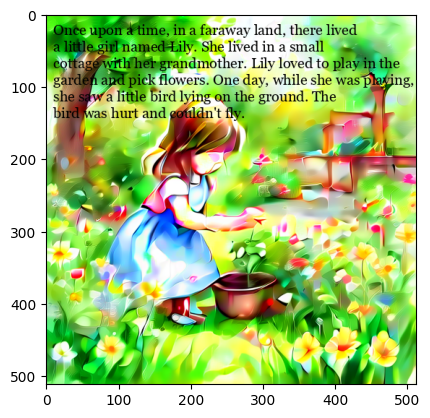

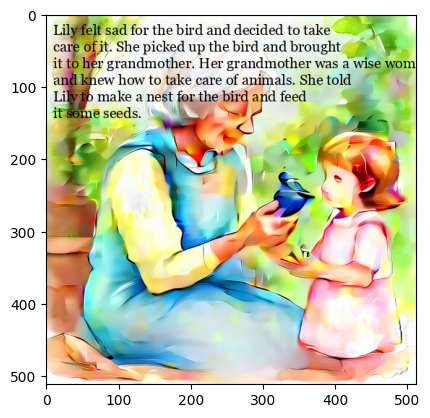

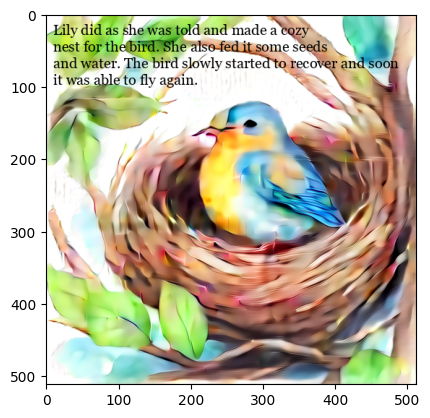

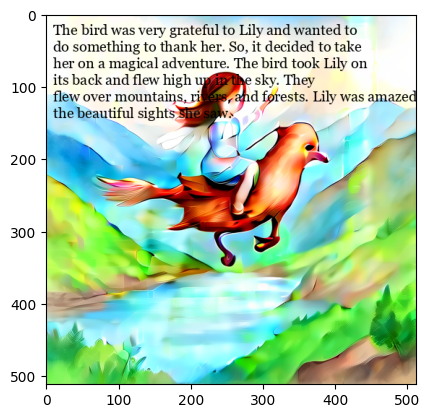

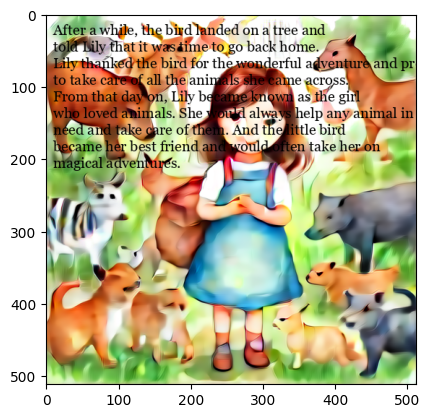

In [ ]:
for page_nbr, contents in page_prompts.items():

  font = '/content/drive/MyDrive/Colab Notebooks/georgia.ttf'
  # creating a image object
  image = img_dict[page_nbr]

  enhancer = ImageEnhance.Brightness(image)
  # to reduce brightness by 50%, use factor 0.5
  img = enhancer.enhance(0.1)

  draw = ImageDraw.Draw(image)

  font = ImageFont.truetype(font, 20)

  text = split_sentence(contents['text'], words_per_line=10)

  draw.text(
      (10, 10), #x, y 0,0 is top left corner
      text, # var
      (0,0,0), # color of text
      font = font # select font
      )
  plt.imshow(image)
  plt.show()

